## Convolutional Autoencoder


In [40]:
import tensorflow as tf
import numpy as np 
import matplotlib

In [41]:
tf.__version__, np.__version__, matplotlib.__version__

('2.17.0', '1.26.4', '3.9.2')

In [42]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

In [43]:
(X_train, _), (X_test, _) = mnist.load_data()

In [44]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [45]:
X_train = X_train.reshape(len(X_train), 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [46]:
X_test = X_test.reshape(len(X_test), 28, 28, 1)
X_test.shape

(10000, 28, 28, 1)

In [47]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [48]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [49]:
X_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [50]:
autoencoder = Sequential()

# Encoder
autoencoder.add(InputLayer(shape=(28, 28, 1)))
autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=(2, 2)))

autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same', strides=(2,2)))
autoencoder.add(Flatten())


# Decoder
autoencoder.add(Reshape((4, 4, 8)))
autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))
 
autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2,2,)))
 
autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same'))


autoencoder.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_80 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 13, 13, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_11 (Reshape)            │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_20 (UpSampling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_21 (UpSampling2D) │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_22 (UpSampling2D) │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.fit(X_train, X_train, epochs=10, batch_size=256, validation_data=(X_test, X_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.7970 - loss: 0.3828 - val_accuracy: 0.7936 - val_loss: 0.1603
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7999 - loss: 0.1515 - val_accuracy: 0.8047 - val_loss: 0.1318
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8063 - loss: 0.1293 - val_accuracy: 0.8079 - val_loss: 0.1195
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8086 - loss: 0.1187 - val_accuracy: 0.8087 - val_loss: 0.1133
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8096 - loss: 0.1136 - val_accuracy: 0.8094 - val_loss: 0.1092
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.8104 - loss: 0.1096 - val_accuracy: 0.8102 - val_loss: 0.1058
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.8109 - loss: 0.1066 - val_accuracy: 0.8102 - val_loss: 0.1035
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8117 - loss: 0.1043 - val_accu

In [59]:
encoder = Model(inputs=autoencoder.get_layer('conv2d_80').input, outputs=autoencoder.get_layer('flatten_18').output)
encoder.summary()

Model: "functional_179"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 13, 13, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 128)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,904 (7.44 KB)

 Trainable params: 1,904 (7.44 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
encoded_imgs = encoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [61]:
encoded_imgs.shape

(10000, 128)

In [62]:
decoded_imgs = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [64]:
decoded_imgs.shape

(10000, 28, 28, 1)

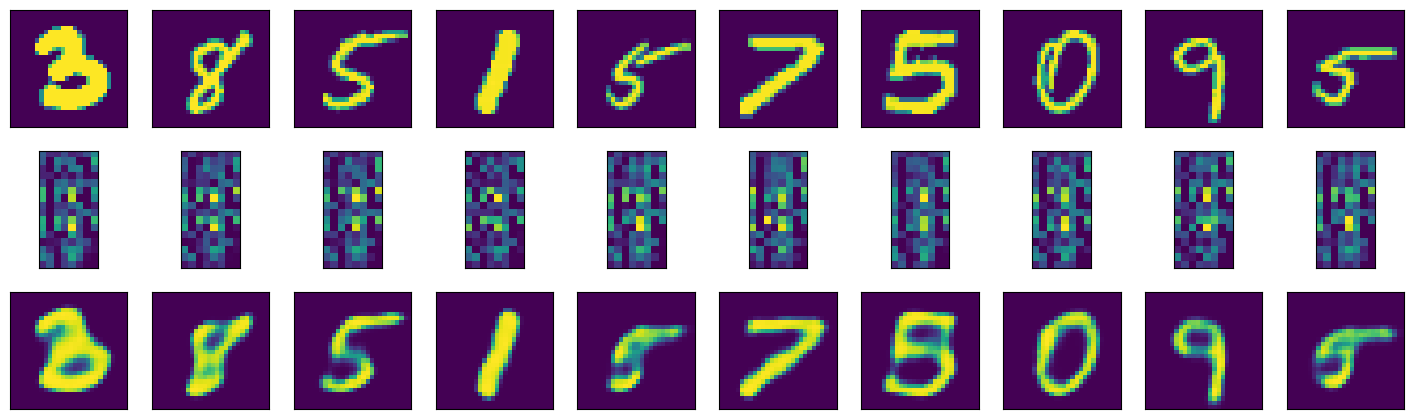

In [69]:
imgs_num = 10
test_imgs = np.random.randint(X_test.shape[0], size=imgs_num)
plt.figure(figsize=(18, 18))
for i, img_index in enumerate(test_imgs):
    # original images
    plt.subplot(10, 10, i+1)
    plt.imshow(X_test[img_index].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())
    # encoded images
    plt.subplot(10, 10, i+1+imgs_num)
    plt.imshow(encoded_imgs[img_index].reshape(16, 8))
    plt.xticks(())
    plt.yticks(())
    # decoded images
    plt.subplot(10, 10, i+1+(imgs_num*2))
    plt.imshow(decoded_imgs[img_index].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())
